# IMPORTING THE MODULES

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook', ticks=True, grid=False)

#setting the style of the notebook to be monokai theme
#this line of code is important to ensure that we are able to see the x and y axes clearly
#if you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black

# LOADING THE DATASET

In [29]:
tweets_df = pd.read_csv('Twitter Sentiments.csv')

In [30]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [31]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [32]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [33]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [35]:
tweets_df = tweets_df.drop('id', axis=1)

In [36]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# EXPLORE THE DATASET

<AxesSubplot:>

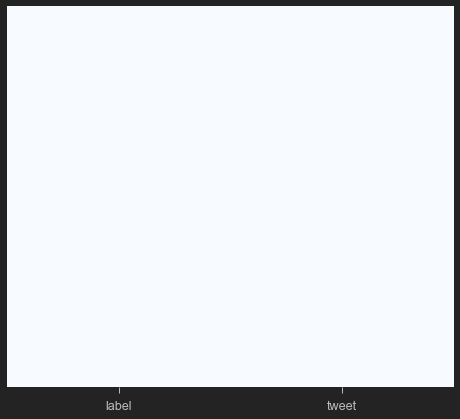

In [38]:
#finding null elements(here we don't have null elements)
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar=False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

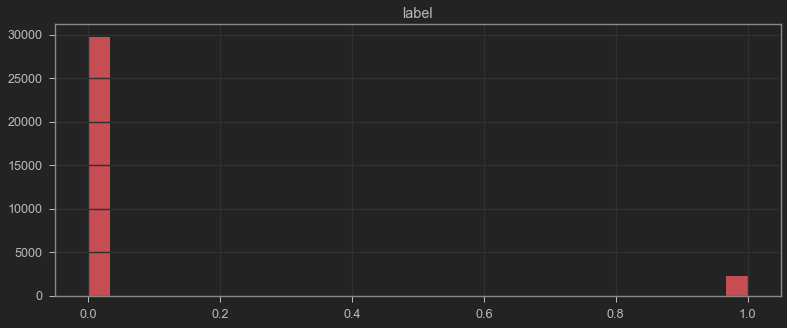

In [39]:
tweets_df.hist(bins = 30, figsize = (13,5), color='r')

C:\Users\SREEJA V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

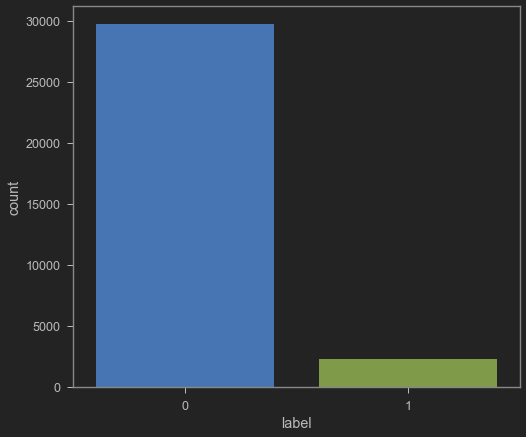

In [41]:
#using seaborn
sns.countplot(tweets_df['label'], label = 'Count')

In [42]:
#Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [43]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

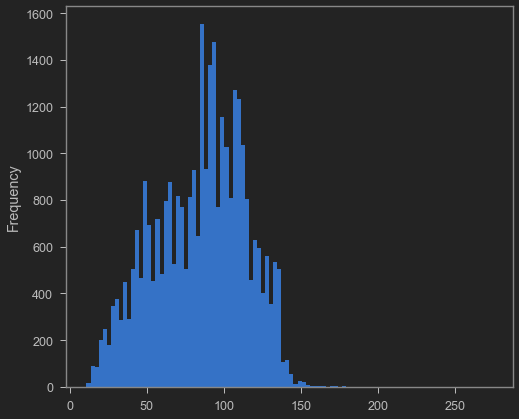

In [44]:
tweets_df['length'].plot(bins=100, kind='hist')

In [45]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [46]:
#Let's see the shortest message
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [47]:
#Messgae with average length
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [48]:
positive = tweets_df[tweets_df['label']==0]

In [49]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [50]:
negative = tweets_df[tweets_df['label']==1]

In [51]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# PLOT THE WORDCLOUD

In [52]:
sentences = tweets_df['tweet'].tolist()

In [54]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [55]:
len(sentences)

31962

In [56]:
sentences_as_one_string = " ".join(sentences)

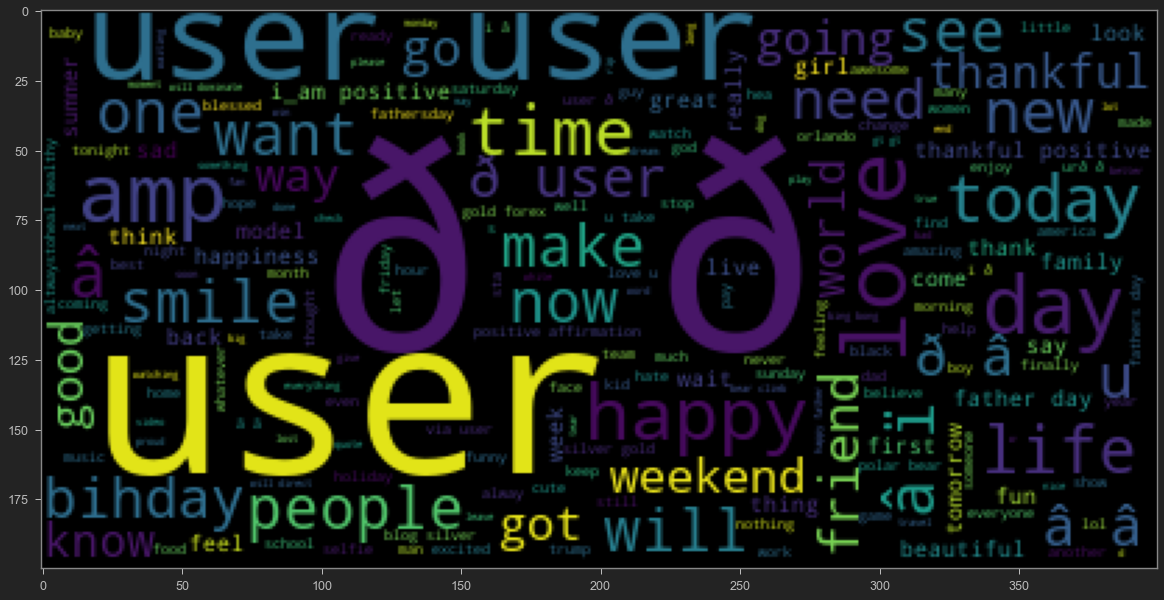

In [57]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

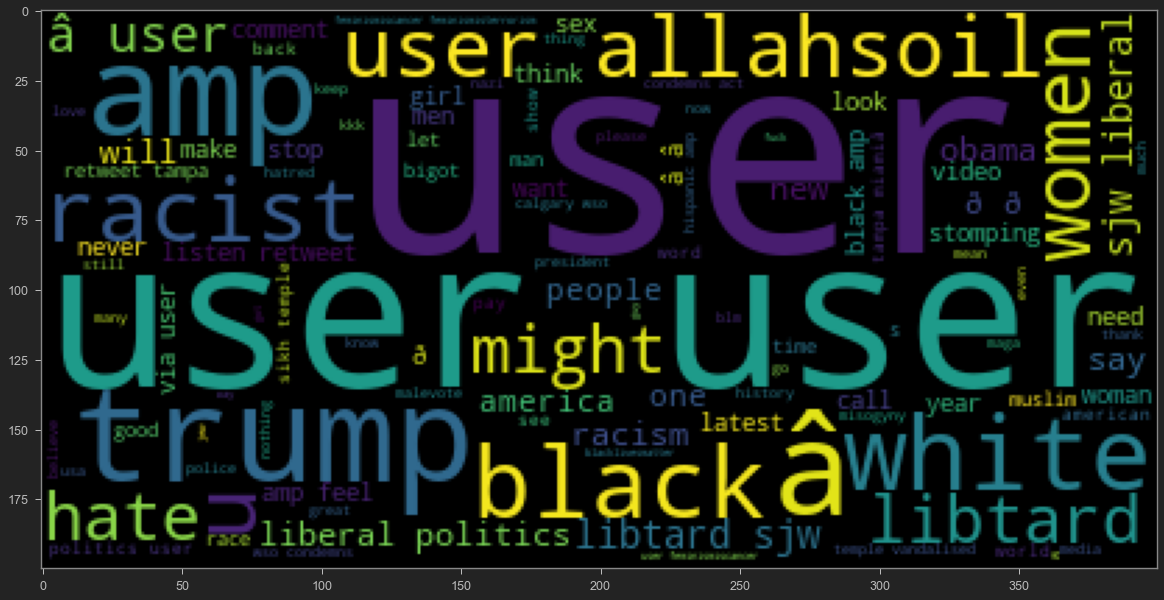

In [58]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [59]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
Test = 'good morning! the journey begins!   #travel #yeah #thejourneybegins #hello'

In [65]:
Test_punc_removed = [ char for char in Test if char not in string.punctuation]

In [66]:
Test_punc_removed

['g',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'j',
 'o',
 'u',
 'r',
 'n',
 'e',
 'y',
 ' ',
 'b',
 'e',
 'g',
 'i',
 'n',
 's',
 ' ',
 ' ',
 ' ',
 't',
 'r',
 'a',
 'v',
 'e',
 'l',
 ' ',
 'y',
 'e',
 'a',
 'h',
 ' ',
 't',
 'h',
 'e',
 'j',
 'o',
 'u',
 'r',
 'n',
 'e',
 'y',
 'b',
 'e',
 'g',
 'i',
 'n',
 's',
 ' ',
 'h',
 'e',
 'l',
 'l',
 'o']

In [76]:
#Join the characters again to form the string
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'good morning the journey begins   travel yeah thejourneybegins hello'

In [77]:
#Removing punctuation using different method
Test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
Test_punc_removed_join = ''.join(Test_punc_removed) 
Test_punc_removed_join

'good morning the journey begins   travel yeah thejourneybegins hello'

# PERFORM DATA CLEANING - REMOVE STOPWORDS

In [71]:
import nltk #natural language toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SREEJA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [73]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [79]:
Test_punc_removed_join_clean

['good',
 'morning',
 'journey',
 'begins',
 'travel',
 'yeah',
 'thejourneybegins',
 'hello']

In [80]:
#For the following text, create a pipeline to remove punctuations followed by removing stopwords
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [83]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge = [ word for word in challenge.split() if word.lower() not in stopwords.words('english') ]

In [84]:
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [87]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [88]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


# CREATE A PIPELINE TO REMOVE STOPWORDS, PUNCTUATION AND PERFORM TOKENIZATION

In [89]:
#Let's define a pipeline to clean up all the messages 
#The pipeline performs the following: (1)remove punctuation (2)remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [92]:
#Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [93]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [94]:
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [97]:
from sklearn.feature_extraction.text import CountVectorizer
#define the cleaning we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [98]:
tweets_countvectorizer.shape

(31962, 47386)

In [99]:
X = tweets_countvectorizer

In [100]:
y = tweets_df['label']

# TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [101]:
X.shape

(31962, 47386)

In [102]:
y.shape

(31962,)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [104]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# ASSESS TRAINED MODEL PERFORMANCE

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

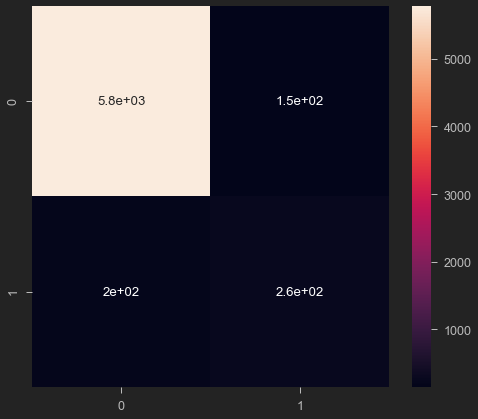

In [106]:
#Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [107]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5929
           1       0.63      0.57      0.60       464

    accuracy                           0.94      6393
   macro avg       0.80      0.77      0.79      6393
weighted avg       0.94      0.94      0.94      6393

